In [ ]:
!pwd

/content


### Downloading the dataset from Kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 96% 259M/271M [00:08<00:00, 36.4MB/s]
100% 271M/271M [00:08<00:00, 31.9MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 74.0MB/s]
 99% 537M/543M [00:08<00:00, 62.8MB/s]
100% 543M/543M [00:08<00:00, 64.3MB/s]


### Unzipping the files

In [ ]:
!unzip /content/competitions/dogs-vs-cats/test1.zip

In [ ]:
!unzip /content/competitions/dogs-vs-cats/train.zip 

### Organizing the files

In [ ]:
import os
from glob import glob

In [ ]:
len(glob('/content/test1/*'))

12500

In [ ]:
glob('/content/test1/*')[:5]

['/content/test1/12200.jpg',
 '/content/test1/7209.jpg',
 '/content/test1/2620.jpg',
 '/content/test1/9457.jpg',
 '/content/test1/8185.jpg']

In [ ]:
import imageio

In [ ]:
import matplotlib.pyplot as plt

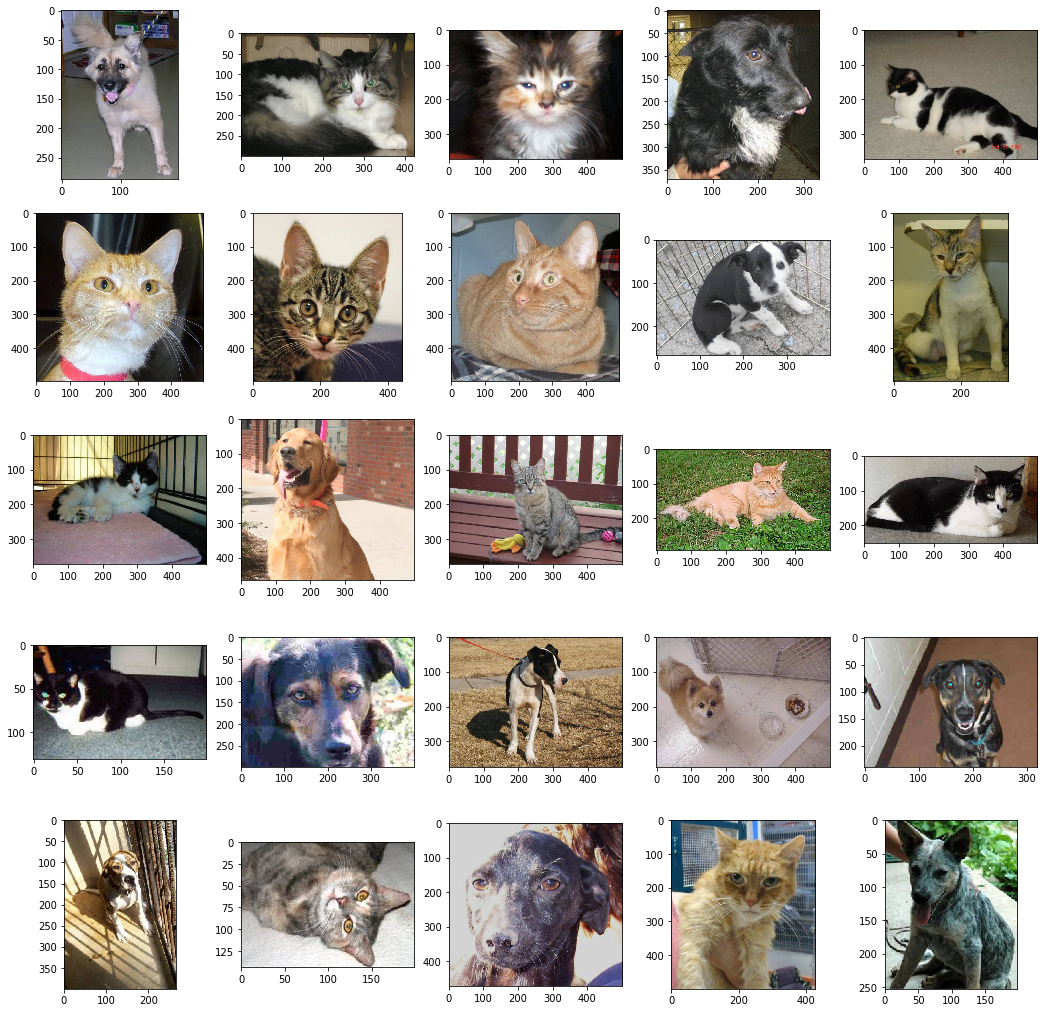

In [ ]:
fig = plt.figure(figsize=(18,18))
for i in range(1,26):
  ax = plt.subplot(5,5,i)
  img = imageio.imread(glob('/content/test1/*')[i])
  plt.imshow(img)
plt.show()

In [ ]:
len(glob('/content/train/*'))

25000

In [ ]:
glob('/content/train/*')[:10]

['/content/train/dog.11642.jpg',
 '/content/train/cat.3292.jpg',
 '/content/train/cat.4147.jpg',
 '/content/train/dog.9444.jpg',
 '/content/train/cat.2017.jpg',
 '/content/train/dog.240.jpg',
 '/content/train/dog.11900.jpg',
 '/content/train/cat.4091.jpg',
 '/content/train/dog.6672.jpg',
 '/content/train/cat.3118.jpg']

In [ ]:
all_dog_images = glob('/content/train/dog*')
all_cat_images = glob('/content/train/cat*')

In [ ]:
len(all_dog_images), len(all_cat_images)

(12500, 12500)

In [ ]:
train_dog = all_dog_images[:5000]
val_dog = all_dog_images[-1000:]

train_cat = all_cat_images[:5000]
val_cat = all_cat_images[-1000:]

In [ ]:
!mkdir dataset

In [ ]:
!mkdir dataset/train
!mkdir dataset/train/dog
!mkdir dataset/train/cat

In [ ]:
!mkdir dataset/val
!mkdir dataset/val/cat
!mkdir dataset/val/dog

In [ ]:
for img in train_dog:
  os.replace(img, img.replace('/train/', '/dataset/train/dog/'))

for img in val_dog:
  os.replace(img, img.replace('/train/', '/dataset/val/dog/'))

for img in train_cat:
  os.replace(img, img.replace('/train/', '/dataset/train/cat/'))

for img in val_cat:
  os.replace(img, img.replace('/train/', '/dataset/val/cat/'))

In [ ]:
len(glob('/content/dataset/val/dog/*'))

1000

In [ ]:
len(glob('train/*'))

13000

# Convolutional Neural Network

In [ ]:
!pip install --upgrade tensorflow keras

In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

In [ ]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
classifier.add(Convolution2D(32, (3, 3), activation='relu'))

In [ ]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(128, activation='relu'))

In [ ]:
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_datagen.flow_from_directory(
        'dataset/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
classifier_info = classifier.fit_generator(
                                            train_set,
                                            steps_per_epoch=10000,
                                            epochs=10,
                                            validation_data=validation_set,
                                            validation_steps=2000
                                           )

Epoch 1/10
10000/10000 [==============================] - 2585s 258ms/step - loss: 0.3472 - accuracy: 0.8397 - val_loss: 0.0917 - val_accuracy: 0.8285
Epoch 2/10
10000/10000 [==============================] - 2506s 251ms/step - loss: 0.1097 - accuracy: 0.9584 - val_loss: 0.2879 - val_accuracy: 0.8212
Epoch 3/10
 9888/10000 [============================>.] - ETA: 25s - loss: 0.0571 - accuracy: 0.9795

KeyboardInterrupt: ignored